### Creating the Dataset

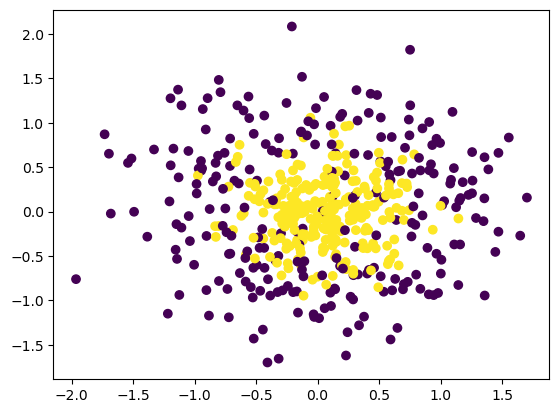

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [6]:
X

array([[-9.32386218e-02,  2.99041641e-01],
       [ 4.15898414e-01,  1.11023783e+00],
       [ 9.87505098e-02,  5.43766155e-02],
       [-3.18616104e-01, -4.98557102e-01],
       [-6.01736430e-01,  1.13675809e+00],
       [-9.36913945e-03, -1.40794778e-01],
       [ 5.63275761e-02,  3.92660379e-01],
       [-8.24184824e-01,  3.96353598e-01],
       [-3.71931480e-01,  6.86631947e-01],
       [-1.59861466e-01, -5.38689457e-01],
       [ 1.01313173e+00,  7.37618759e-02],
       [ 5.93211139e-01, -1.43861447e+00],
       [ 4.73069369e-01, -4.13685114e-01],
       [-9.47820332e-01,  5.68898692e-01],
       [ 5.83452928e-01, -3.99362660e-03],
       [ 9.05925986e-02, -9.64564692e-02],
       [ 6.76839485e-02, -1.89591342e-01],
       [ 7.46729013e-01,  8.57657068e-01],
       [ 5.78621809e-01, -5.56450745e-01],
       [ 4.96253827e-01,  1.11034838e-01],
       [-3.18586578e-02, -2.16572208e-01],
       [ 4.62739163e-01,  5.77154123e-02],
       [-4.64025929e-01,  1.95529072e-01],
       [ 3.

In [7]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

### Training the AdaBoost Classifier

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

model = AdaBoostClassifier()
accuracy = np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=10))
print(f"Cross-Validation Accuracy: {accuracy}")

model.fit(X, y)

Cross-Validation Accuracy: 0.786


AdaBoostClassifier()

### Visualizing the Decision Boundary

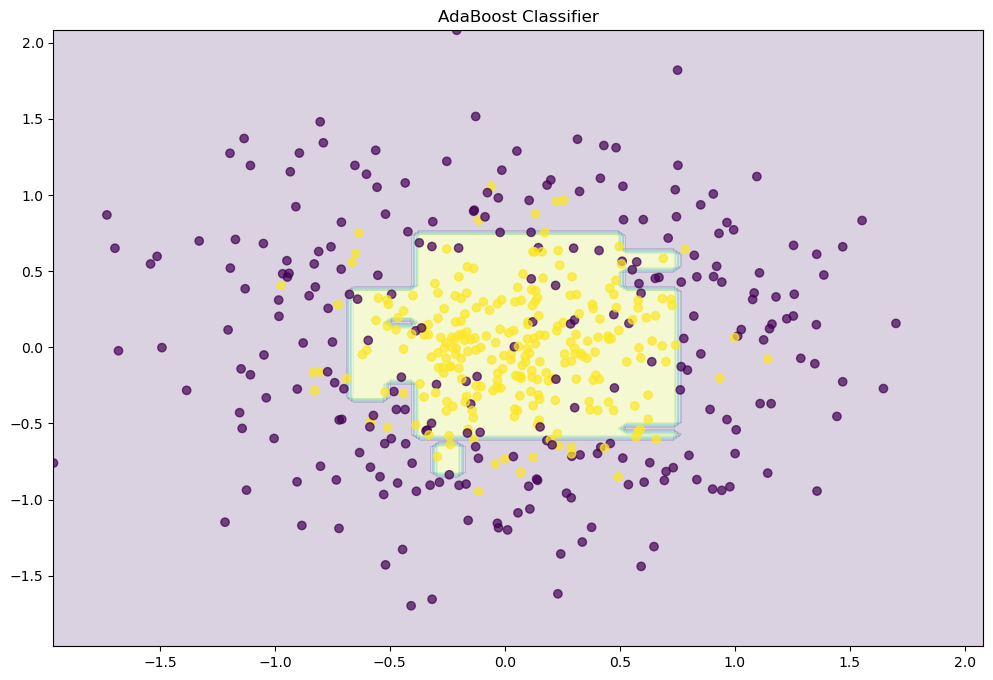

In [3]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("AdaBoost Classifier")
    plt.show()

plot_decision_boundary(model)

### Hyperparameter Tuning

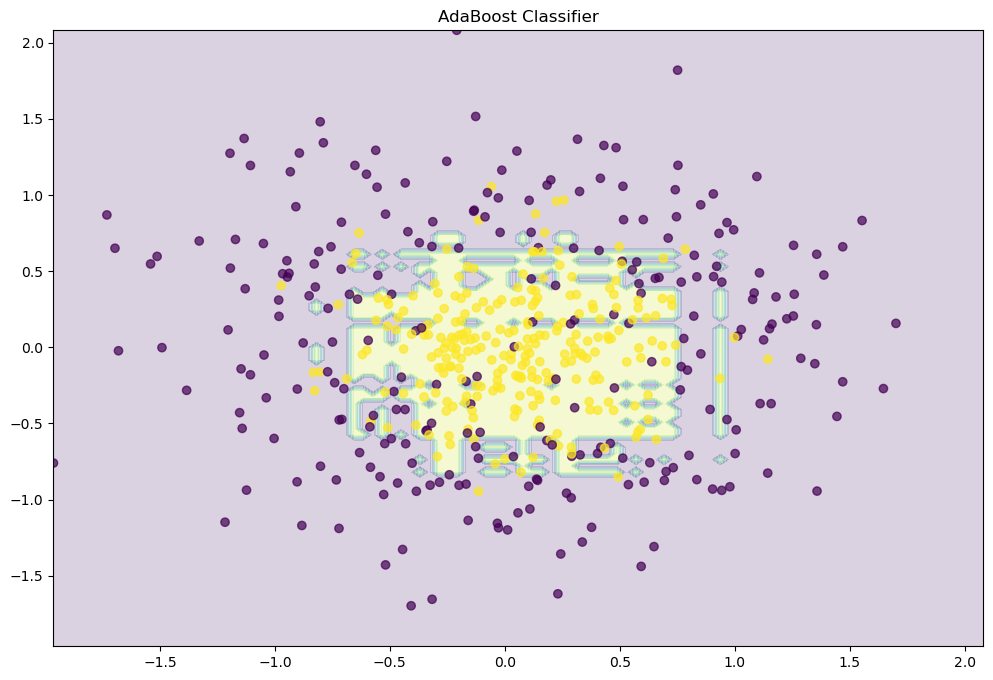

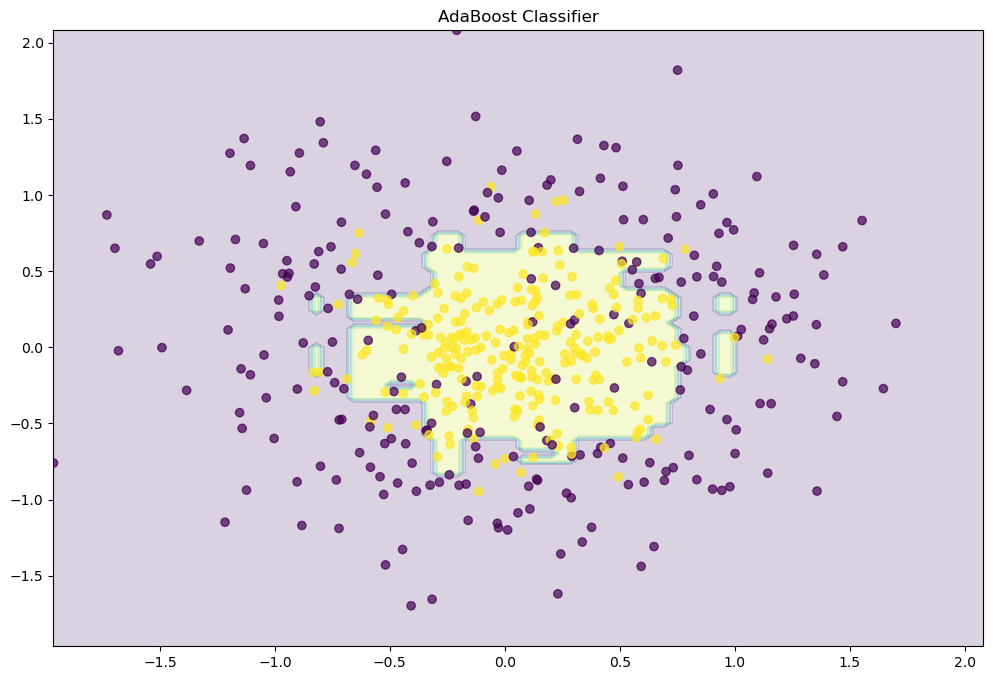

In [ ]:
model_1 = AdaBoostClassifier(n_estimators=1500) # TRIES TO OVERFIT THE DATA
model_1.fit(X, y)
plot_decision_boundary(model_1)

model_2 = AdaBoostClassifier(n_estimators=1500, learning_rate=0.1) # better smoothening
model_2.fit(X, y)
plot_decision_boundary(model_2)

### Grid Search for Hyperparameter Tuning

In [5]:
from sklearn.model_selection import GridSearchCV

grid = {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
grid_result = grid_search.fit(X, y)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.8320000000000001 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}


### Run on the best parameters

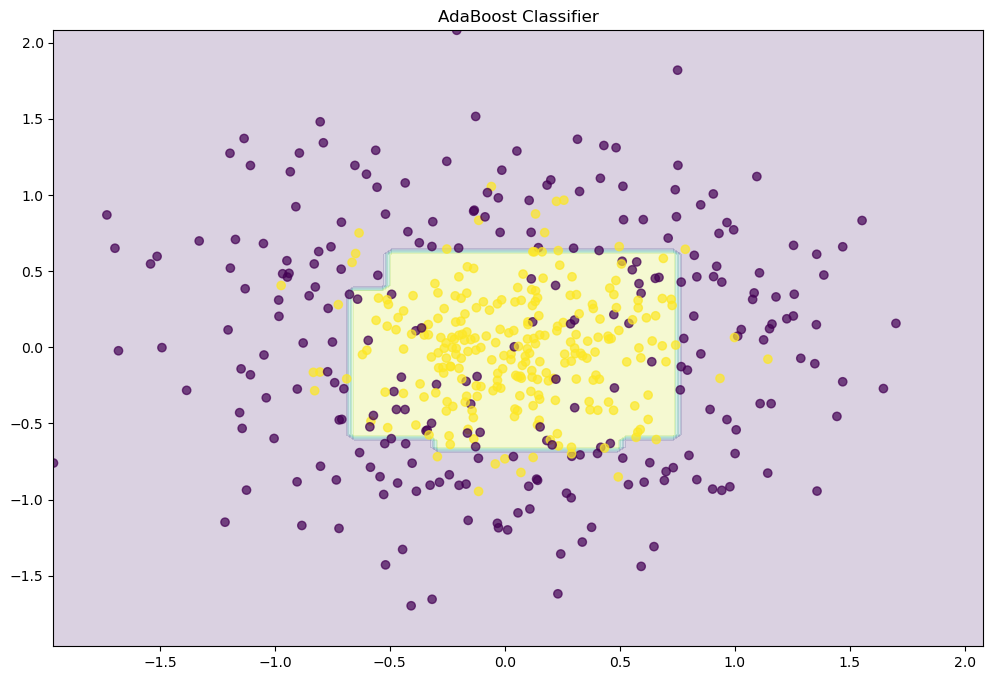

In [8]:
model_3 = AdaBoostClassifier(n_estimators=500,algorithm='SAMME', learning_rate=0.1) # better smoothening
model_3.fit(X, y)
plot_decision_boundary(model_3)

In [11]:
Accuracy = model_3.score(X, y)
print(f"the accuracy when I use the best parameters {accuracy}")

the accuracy when I use the best parameters 0.786
